In [20]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [5]:
! wget -P data/ https://www.disgenet.org/static/disgenet_ap1/files/downloads/all_gene_disease_associations.tsv.gz
! gunzip data/all_gene_disease_associations.tsv.gz
df = pd.read_table('data/all_gene_disease_associations.tsv')

--2022-10-14 23:03:02--  https://www.disgenet.org/static/disgenet_ap1/files/downloads/all_gene_disease_associations.tsv.gz
Resolving www.disgenet.org (www.disgenet.org)... 84.89.134.141
Connecting to www.disgenet.org (www.disgenet.org)|84.89.134.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21446175 (20M) [application/x-gzip]
Saving to: ‘data/all_gene_disease_associations.tsv.gz’

all_gene_disease_as 100%[===================>]  20.45M  3.69MB/s    in 1m 49s  

2022-10-14 23:04:51 (193 KB/s) - ‘data/all_gene_disease_associations.tsv.gz’ saved [21446175/21446175]



In [16]:
gene2disease = dict()
disease2gene = dict()

for i in range(0,len(df)):
    gene = df['geneId'].iloc[i]
    disease = df['diseaseId'].iloc[i]
    gene2disease.setdefault(gene, set()).add(disease)
    disease2gene.setdefault(disease, set()).add(gene)
gene2disease = dict(sorted(gene2disease.items(), key=lambda x:x[1], reverse=True))
disease2gene = dict(sorted(disease2gene.items(), key=lambda x:x[1], reverse=True))

In [32]:
gene2num_disease = dict()
disease2num_genes = dict()

for gene,diseases in gene2disease.items():
    gene2num_disease[gene] = len(diseases)
for disease,genes in disease2gene.items():
    disease2num_genes[disease] = len(genes)

1 min 
2724 max 
52.37146416870472 average 
16.0 median 


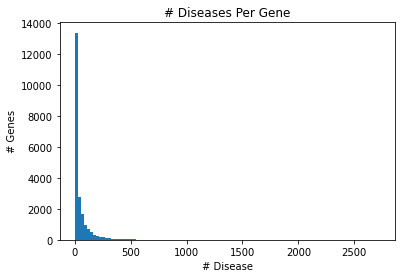

In [33]:
plt.title('# Diseases Per Gene');
plt.xlabel('# Disease')
plt.ylabel('# Genes')
plt.hist(list(gene2num_disease.values()), bins=100);
print(min(list(gene2num_disease.values())), 'min ')
print(max(list(gene2num_disease.values())), 'max ')
print(np.mean(list(gene2num_disease.values())), 'average ')
print(np.median(list(gene2num_disease.values())),'median ')

1 min 
10161 max 
37.61823002983096 average 
3.0 median 


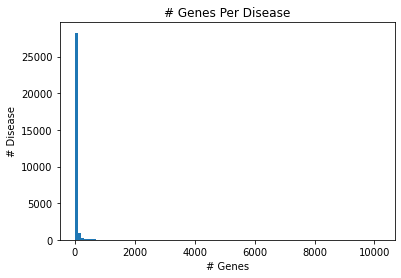

In [34]:
plt.title('# Genes Per Disease');
plt.ylabel('# Disease')
plt.xlabel('# Genes')
plt.hist(list(disease2num_genes.values()), bins=100);
print(min(list(disease2num_genes.values())), 'min ')
print(max(list(disease2num_genes.values())), 'max ')
print(np.mean(list(disease2num_genes.values())), 'average ')
print(np.median(list(disease2num_genes.values())),'median ')

In [36]:
gene2num_disease = dict(sorted(gene2num_disease.items(), key=lambda x:x[1], reverse=True))
disease2num_genes = dict(sorted(disease2num_genes.items(), key=lambda x:x[1], reverse=True))


In [41]:
#gene2num_disease

In [40]:
#disease2num_genes

In [12]:
num_dis = len(set(df['diseaseId']))
num_gdas = len(df)
num_genes = len(set(df['geneId']))

print(num_dis, 'diseases')
print(num_genes, 'genes')
print(num_gdas, 'gene-disease associations')
print(round(num_gdas/num_genes, 4), 'genes per disease')
print(round(num_gdas/num_dis, 4), 'diseases per genes')

30170 diseases
21671 genes
1134942 gene-disease associations
52.3715 genes per disease
37.6182 diseases per genes


In [43]:
dict(df['diseaseSemanticType'].value_counts())

{'Disease or Syndrome': 439266,
 'Neoplastic Process': 426243,
 'Finding': 74835,
 'Mental or Behavioral Dysfunction': 55095,
 'Congenital Abnormality': 42736,
 'Sign or Symptom': 32147,
 'Anatomical Abnormality': 12984,
 'Pathologic Function': 12874,
 'Laboratory Procedure': 12329,
 'Acquired Abnormality': 5761,
 'Clinical Attribute': 3408,
 'Organism Attribute': 3159,
 'Experimental Model of Disease': 1957,
 'Injury or Poisoning': 1802,
 'Mental Process': 1735,
 'Laboratory or Test Result': 1734,
 'Neoplastic Process; Experimental Model of Disease': 1342,
 'Diagnostic Procedure': 1218,
 'Individual Behavior': 1191,
 'Disease or Syndrome; Congenital Abnormality': 1134,
 'Cell or Molecular Dysfunction': 698,
 'Organ or Tissue Function': 640,
 'Organism Function': 332,
 'Cell Function': 79,
 'Body Substance': 61,
 'Cell Component': 52,
 'Temporal Concept': 48,
 'Molecular Function': 45,
 'Disease or Syndrome; Anatomical Abnormality': 16,
 'Physiologic Function': 9,
 'Social Behavior': 9

In [44]:
df

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,0.01,1.0,2008.0,2008.0,1,0,LHGDN
1,1,A1BG,0.700,0.538,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,0.01,1.0,2008.0,2008.0,1,0,BEFREE
2,1,A1BG,0.700,0.538,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,0.01,1.0,2017.0,2017.0,1,0,BEFREE
3,1,A1BG,0.700,0.538,C0003864,Arthritis,disease,C05,Disease or Syndrome,0.01,1.0,2019.0,2019.0,1,0,BEFREE
4,1,A1BG,0.700,0.538,C0008373,Cholesteatoma,disease,C17,Disease or Syndrome,0.01,1.0,2020.0,2020.0,1,0,BEFREE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134937,115804232,CEROX1,NaN,NaN,C0005890,Body Height,phenotype,NaN,Organism Attribute,0.10,1.0,2019.0,2019.0,1,0,GWASCAT
1134938,115891964,MIR223HG,0.861,0.077,C0023418,leukemia,disease,C04,Neoplastic Process,0.01,1.0,2016.0,2016.0,1,0,BEFREE
1134939,115891964,MIR223HG,0.861,0.077,C0023467,"Leukemia, Myelocytic, Acute",disease,C04,Neoplastic Process,0.01,1.0,2016.0,2016.0,1,0,BEFREE
1134940,115891964,MIR223HG,0.861,0.077,C0598766,Leukemogenesis,disease,C23;C04,Neoplastic Process,0.01,1.0,2016.0,2016.0,1,0,BEFREE
